In [1]:
from collections import defaultdict
import numpy as np 

def  moore_algorithm(graph):
  total_state_num = len(graph)  
  equivalence_class = {}
  
# l = 1
  map = defaultdict(set)
  state_idx = 0
  for node in graph:
    output_idxs = graph[node]
    edges_labels_list = []
    for output_idx in output_idxs:
      edges_labels_list.extend(edges_label[(node,output_idx)])
    map[tuple(edges_labels_list)].add(state_idx)
    state_idx += 1
  #  Pi_1
  state_sets = map.values()
  print('initial sets number')
  print(len(state_sets))

  set_graph = state_set_to_graph(state_sets, total_state_num)
  new_set_graph = state_graph_to_set(set_graph)
  #l > 1
  #state_sets_new = partition_unpdate(state_sets, graph)
 # while len(state_sets_new) != len(state_sets):
  #  print('sets number')
 #   print(len(state_sets_new))
 #   state_sets = state_sets_new
#    state_sets_new = partition_unpdate(state_sets, graph)
  #equivalence_class = state_sets_new
  #print(len(equivalence_class))
  equivalence_class = state_sets
  return equivalence_class


def state_set_to_graph(state_sets, total_state_num):
  set_graph = np.zeros((total_state_num,total_state_num))
  for state_set in state_sets:
    state_set = sorted(state_set)
    set_idx = min(state_set)
    for state in state_set:
      set_graph[set_idx][state] = 1
  return set_graph


def state_graph_to_set(set_graph):
  state_sets = []
  for row in set_graph:
    output_edge_idx = np.nonzero(row)
    output_edge_idx = set(output_edge_idx[0])
    if len(output_edge_idx) > 0:
      state_sets.append(output_edge_idx)
  return state_sets


def partition_unpdate(state_sets, graph):
  total_state_num = len(graph) 
  set_graph = state_set_to_graph(state_sets, total_state_num)
  for state_set in state_sets:
    one_state = min(state_set)  # take the min state because all the states in the same set have same edges
    output_edges = graph[one_state]
    for des_state, edge_label in output_edges:
      des_state_set_idx_map_state = defaultdict(set)
      for state in state_set:
        des_state_set_idx = np.where(set_graph[:,des_state] == 1)
        des_state_set_idx = des_state_set_idx[0][0]
        des_state_set_idx_map_state[des_state_set_idx].add(state)
        
      if len(des_state_set_idx_map_state) > 1:
        for state_set in des_state_set_idx_map_state.values():
          set_idx = min(state_set)
          set_graph[set_idx] = 0
          set_graph[set_idx][list(state_set)] = 1  
  state_sets = state_graph_to_set(set_graph)
  #print(state_sets)
  return state_sets


def graph_list(matrix):
  state_num = len(matrix[0])
  graph_dict = defaultdict(set)
  for i in range(state_num):
    for j in range(len(matrix[i])):
      if matrix[i][j] != 0:
        graph_dict[i].add((j))
        edges_label[(i,j)].add(matrix[i][j])
  return graph_dict

def graph_list_reverse(matrix):
  state_num = len(matrix[0])
  graph_dict_reverse = defaultdict(list)
  for i in range(state_num):
    for j in range(len(matrix[i])):
      if matrix[i][j] != 0:
        graph_dict_reverse[j].append((i, matrix[i][j]))
  return graph_dict_reverse

def graph_list_to_matrix(graph_dict,edges_label):
  matrix = np.zeros((len(graph_dict),len(graph_dict)))
  for from_node in graph_dict:
    for to_node in graph_dict[from_node]:
      matrix[from_node][to_node] = len(edges_label[(from_node,to_node)])
  return matrix


def state_merge(x_dict,equivalence_class):
  for state_set in equivalence_class:
    set_list = list(state_set)
    saved_state = set_list[0]

    #remove all outgoing edges in removed_state
    for removed_state in set_list[1:]:
      for out_state in x_dict[removed_state]:
        edges_label.pop((removed_state,out_state))

      #redirect incoming edges of removed_state to saved_state
      all_points_from = [pointsFrom for (pointsFrom, pointsTo) in x_dict.items() if removed_state in pointsTo]
      for point_from in all_points_from:
        x_dict[point_from].remove(removed_state)
        x_dict[point_from].add(saved_state)
        edges_label[(point_from,saved_state)].update(edges_label[(point_from,removed_state)])
        edges_label.pop((point_from,removed_state))

      #remove removed_state
      x_dict.pop(removed_state)



def state_merge_follower_sets(x_dict,follower_sets):
  for saved_state in follower_sets:
    set_list = list(follower_sets[saved_state])
    #print(set_list)
    #remove all outgoing edges in removed_state
    for removed_state in set_list:
      for out_state in x_dict[removed_state]:
        edges_label.pop((removed_state,out_state))

      #redirect incoming edges of removed_state to saved_state
      all_points_from = [pointsFrom for (pointsFrom, pointsTo) in x_dict.items() if removed_state in pointsTo]
      for point_from in all_points_from:
        x_dict[point_from].remove(removed_state)
        x_dict[point_from].add(saved_state)
        edges_label[(point_from,saved_state)].update(edges_label[(point_from,removed_state)])
        edges_label.pop((point_from,removed_state))

      #remove removed_state
      x_dict.pop(removed_state)



def make_follower_sets(node_set):
  node_list = list(node_set)
  visited = set()
  follower_sets = defaultdict(set)
  for i in range(len(node_list)):
    A = node_list[i]
    if A not in visited:
      for j in range(i,len(node_list)):
        B = node_list[j]
        if B not in visited:
          if approximate_eigenvalues[A] != approximate_eigenvalues[B]:
             dir = -1
          else:
             dir = subset(A,B)
          if dir == 1 or dir == 0:
            follower_sets[A].add(B)
            if B in follower_sets.keys():
              follower_sets[A].update(follower_sets[B])
              follower_sets.pop(B)
            visited.add(B)
          if dir == 2:
            follower_sets[B].add(A)
            if A in follower_sets.keys():
              follower_sets[B].update(follower_sets[A])
              follower_sets.pop(A)
            visited.add(A)
          if dir == -1:
            follower_sets[B].update(set())
            follower_sets[A].update(set())
  return follower_sets   



def make_follow_set_graph(x_dict):
  for from_node in x_dict:
    for to_node in x_dict[from_node]:
      labels = edges_label[(from_node, to_node)]
      for label in labels:
        label_list.add(label)
        follow_set_graph[(from_node, label)] = to_node



def subset(A,B):
  belong_dir = 0 # 1:A is bigger A->B, 2: B->A
  for i in range(len(label_list)):
    if (A, label_list[i]) not in follow_set_graph and (B, label_list[i]) not in follow_set_graph:
      continue
    if (A, label_list[i]) not in follow_set_graph: #A is empty, B is larger
      if belong_dir == 1:
        return -1
      if belong_dir == 0:
        belong_dir = 2
    elif (B, label_list[i]) not in follow_set_graph: # B is empty, A is larger
      if belong_dir == 2:
        return -1
      if belong_dir == 0:
        belong_dir = 1
    elif follow_set_graph[(A, label_list[i])] == follow_set_graph[(B, label_list[i])]:
      continue
    else:
      return -1
  return belong_dir




def rerange_graph_dict(x_dict,edges_label_new,edges_label):
  node_map = {}
  new_graph_dict = defaultdict(set)
  i = 0
  for node in x_dict:
    node_map[node] = i
    i += 1
  
  for node in x_dict:
    for to_node in x_dict[node]:
      new_graph_dict[node_map[node]].add(node_map[to_node])
      edges_label_new[(node_map[node],node_map[to_node])].update(edges_label[(node,to_node)])

  return new_graph_dict


def franaszek(x_graph, ep):
  l = len(x_graph)
  y = np.array([ep]*l)
  x = np.array([0]*l)
  n = 256 
  while not (x == y).all():
    x = y
    avgA = np.dot(x_graph,x)/n
    avgA = np.floor(avgA)
    y = np.minimum(avgA, x)
  return y.tolist()

def state_split(approximate_eigenvalues, x_dict, edges_label,x_graph):
    while not check_finished(x_graph):
      if sum(approximate_eigenvalues) == len(approximate_eigenvalues):
        break
      max_x = max(approximate_eigenvalues)
      pos = [i for i, j in enumerate(approximate_eigenvalues) if j == max_x]
      node = pos[0]
      m = np.count_nonzero(x_graph[node])
      xm = np.nonzero(x_graph[node])[0]
      theta = [0]*m
      theta[0] = x_graph[node,xm[0]]*approximate_eigenvalues[xm[0]]
      bound = 0
      mod_map = {}
      for i in range(1,m):
        theta[i] = theta[i-1] + x_graph[node,xm[i]]*approximate_eigenvalues[xm[i]]
        mod = theta[i]%total_outout_degree
        if theta[i]%total_outout_degree == 0:
          bound = i
          break
        else:
          if mod in mod_map:
            bound = -1
            m1 = mod_map[mod]
            m2 = i
            break
          mod_map[mod] = i
      if bound > 0:
        e1 = [j for i,j in enumerate(xm) if i <= bound]
        e2 = [j for i,j in enumerate(xm) if i > bound]
      elif bound < 0:
        e1 = [j for i,j in enumerate(xm) if m1< i <= m2]
        e2 = [j for i,j in enumerate(xm) if i <= m1 or i > m2]
      else:
        print("wrong!!!!!!!!")
        return []
     # ttt1 = 0
     # for e11 in e1:
     #   ttt1 += x_graph[node,e11]*approximate_eigenvalues[e11]
     # print(ttt1)

     # ttt2 = 0
     # for e22 in e2:
     #   ttt2 += x_graph[node,e22]*approximate_eigenvalues[e22]

      x_dict = split(node,e1,e2,x_dict,edges_label,x_graph,approximate_eigenvalues)  
      x_graph = graph_list_to_matrix(x_dict,edges_label)
    return x_graph


def split(node,e1,e2,x_dict,edges_label,x_graph,approximate_eigenvalues):
  #case 1:
  current_node_idx = len(x_dict)
  approximate_eigenvalues.append(1)
  approximate_eigenvalues[node] = 1
  from_nodes = np.nonzero(x_graph[:,node])[0]
  for from_node in from_nodes:
    x_dict[from_node].add(current_node_idx)
    edges_label[(from_node,current_node_idx)].update(edges_label[(from_node,node)])

  #case 2:
  for to_node in e2:
    if to_node != node:
      x_dict[current_node_idx].add(to_node)
      edges_label[(current_node_idx,to_node)].update(edges_label[(node,to_node)])
      
      x_dict[node].remove(to_node)
      edges_label.pop((node,to_node))
  #case 3:
  for to_node in e1:
    if to_node == node:
      x_dict[node].add(current_node_idx)
      edges_label[(node,current_node_idx)].update(edges_label[(node,to_node)])

  for to_node in e2:
    if to_node == node:
      x_dict[current_node_idx].add(node)
      edges_label[(current_node_idx,node)].update(edges_label[(node,node)])
      x_dict[current_node_idx].add(current_node_idx)
      edges_label[(current_node_idx,current_node_idx)].update(edges_label[(node,node)])

      x_dict[node].remove(node)
      edges_label.pop((node,node))
  return x_dict

def check_finished(x_graph):
  for node in range(len(x_graph)):
    if(sum(x_graph[node]) < total_outout_degree):
      return False
  return True

def encoder_fun(input_data,encoder_labels_list,currentState):
  real_path.append(currentState)
  codeword = dict()
  for input_data_idx in range(len(input_data)):
    input_label = input_data[input_data_idx]
    encoder_labels_map = encoder_labels_list[currentState]
    output_label = encoder_labels_map[input_label][0]
    codeword[input_data_idx] = output_label
    currentState = encoder_labels_map[input_label][1]
    real_path.append(currentState)
  return codeword

def c2number(dna_str):
  dna_num = 0
  for c in dna_str:
    if c == 'A':
      dna_num = dna_num*10 + 1
    elif c == 'C': 
      dna_num = dna_num*10 + 2
    elif c == 'G': 
      dna_num = dna_num*10 + 3
    elif c == 'T': 
      dna_num = dna_num*10 + 4
  return dna_num

def number2str(dna_num):
  dna_str = ""
  while(dna_num > 0):
    n = dna_num%10
    dna_num //= 10
    if n == 1:
      dna_str = 'A' + dna_str  
    elif n == 2:
      dna_str = 'C' + dna_str
    elif n == 3:
      dna_str = 'G' + dna_str
    elif n == 4:
      dna_str = 'T' + dna_str
  return dna_str

def channel(codewrd_str,mus, sigmas, sigma_var):
  kmer = 6
  c = ""
  signal_arr = dict()
  code_idx = 0
  for i in range(len(codewrd_str)- kmer+1):
    c = codewrd_str[i:i+6]
    code_num = c2number(c)
    mu = mus[code_num]
    sigma = sigmas[code_num]
    s = np.random.normal(mu, sigma*sigma_var, 1)
    signal_arr[code_idx] = s[0]
    code_idx += 1
  return list(signal_arr.values())

def channel_del(codewrd_str, del_rate):
    new_codewrd = [codewrd_str[0]]
    for idx in range(1,len(codewrd_str)):
        rad_num = np.random.random(1)[0]
        # if (rad_num > del_rate or idx < 5) and idx != 2:
        if idx == 2:
          del_pos.append(idx)
        elif (rad_num > del_rate or (idx - del_pos[-1] <=5)) :
            new_codewrd.append(codewrd_str[idx])
        else:
          del_pos.append(idx)
    return new_codewrd

# def channel_delSig(signal_arr, del_rate):
#     new_codewrd = []
#     for idx in range(len(codewrd_str)):
#         rad_num = np.random.random(1)[0]
#         if rad_num > del_rate and idx != 7:
#             new_codewrd.append(codewrd_str[idx])
#         else:
#           del_pos.append(idx)
#     return new_codewrd

In [2]:
import numpy as np
import pandas as pd
total_state_num = 4096
total_outout_degree = 256
x  = pd.read_csv("matrix.csv",header=None).to_numpy();
print(x.shape)
edges_label = defaultdict(set)
x_dict = graph_list(x)

equivalence_class = moore_algorithm(x_dict)
state_merge(x_dict,equivalence_class)

edges_label_new = defaultdict(set)
x_dict = rerange_graph_dict(x_dict,edges_label_new,edges_label)
edges_label = edges_label_new

x_graph = graph_list_to_matrix(x_dict,edges_label)
approximate_eigenvalues = []
approximate_eigenvalues = franaszek(x_graph, 2)
follow_set_graph = dict() # (from_node, label): to_node 
label_list = set()
make_follow_set_graph(x_dict)
label_list = list(label_list)
# merge follower set
follower_sets_1 = make_follower_sets(x_dict.keys())
state_merge_follower_sets(x_dict,follower_sets_1)

edges_label_new = defaultdict(set)
x_dict = rerange_graph_dict(x_dict,edges_label_new,edges_label)
edges_label = edges_label_new
x_graph = graph_list_to_matrix(x_dict,edges_label)
approximate_eigenvalues = franaszek(x_graph, 2)
print(approximate_eigenvalues)

(2021, 2021)
initial sets number
211
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0]


In [3]:
x_graph = state_split(approximate_eigenvalues, x_dict, edges_label,x_graph)

print(np.sum(x_graph[2,:]))
# encoder_labels_list<map<input, output>>, list size : number of state.  map size: 256
encoder_labels_list = dict()
for i in range(len(x_graph)):
  total_outout_degree
  out_degree = 0
  encoder_labels_map = []
  for j in range(len(x_graph)):
    if x_graph[i,j] != 0 and out_degree < total_outout_degree:
      edges = edges_label[i,j]
      for edge in edges:
        if out_degree < total_outout_degree:
          encoder_labels_map.append([edge,j])
          out_degree += 1
  encoder_labels_list[i] = encoder_labels_map

261.0


In [4]:
file1 = open('kmer.txt', 'r') 
count = 0
mus = dict()
sigmas = dict()
while True: 
    count += 1
    # Get next line from file 
    line = file1.readline() 
    if not line: 
        break
    l = line.split()
    dna_num = c2number(l[0])
    mus[dna_num] = float(l[1])
    sigmas[dna_num] = float(l[2])
file1.close() 

In [5]:


def array2num(array):
    num = 0
    for idx in range(len(array)):
        num = num*10 + array[idx]
    return num

def char_freq(codewords):
    c_counter = dict()
    for c_word in codewords:
        for idx in range(len(c_word)):
            tup = tuple(c_word[0:idx+1])
            c_counter[tup] = c_counter.get(tup, 0)+1
    return c_counter
    
def cal_pro(c_counter,c_word,codewords_num):
    p_pre = 1
    p_cs = []
    for idx in range(len(c_word)):
        p_union = c_counter[tuple(c_word[0:idx+1])]/(codewords_num)
        p_c = (p_union)/p_pre
        p_pre = p_union
        p_cs.append(p_c) 
    return p_cs
def num2array(num):
    array = []
    while num > 0:
        array.append(num%10)
        num //= 10
    return array[::-1] 

In [6]:
from scipy import stats
import math 
def dp_score(prefix_label, cur_label, signal, mus, sigmas, sigma_var, deleRate ,next_state):
    fade = 1
    matrix_len = len(signal) + 1
    dp_matrix = np.zeros([matrix_len, matrix_len])
    dp_matrix[0,0] = 1
    delAlpha = 0.005
    for i in range(1,matrix_len):
        dp_matrix[i,0] = 1
        # dp_matrix[0,i] = p_cs[0]*deleRate*dp_matrix[0,i-1]

    for strIdx in range(1, matrix_len):
        code_num_array = prefix_label[strIdx-1:] + cur_label[0:strIdx]
        code_num = array2num(code_num_array)
        # if next_state == 58:
        #     print(code_num)
        for sig_idx in range(1, strIdx + 1):
            x = (signal[sig_idx-1] - mus[code_num])/(sigmas[code_num]*sigma_var) 
            f_a = math.exp(-x**2/2)/math.sqrt(2*math.pi)
            sub = f_a*(dp_matrix[strIdx-1,sig_idx-1]**fade)
            deli = dp_matrix[strIdx-1,sig_idx]
            dp_matrix[strIdx,sig_idx] = max([sub,deli]) 


    dp_matrix[-1,-2] = dp_matrix[-1,-2]*deleRate*delAlpha;
    # if(dp_matrix[-1,-1] >= dp_matrix[-1,-2]*deleRate*delAlpha):
    if(dp_matrix[-1,-1] >= dp_matrix[-1,-2]):
        maxV = dp_matrix[-1,-1]
        del_num = 0
    else:
        maxV = dp_matrix[-1,-2]
        del_num = 1
    if maxV < 1.0e-100 or maxV == 0:
        maxV = -math.inf
        del_num = -1
    else:
        maxV = math.log(maxV,10)                                
    # if next_state == 44:
    #     print("dp1",dp_matrix[-1,-1])
    #     print("dp2",dp_matrix[-1,-2])
    #     np.set_printoptions(precision=3)
    #     print(dp_matrix)
    #     print("cur_label", cur_label)
    #     print("prefix_label", prefix_label)
    #     print("signal", signal)
    return (maxV,del_num)
    

In [7]:
 dp_matrix = np.zeros([3, 3])
 dp_matrix[1][1] = 1
 np.unravel_index(np.argmax(dp_matrix, axis=None), dp_matrix.shape)

(1, 1)

In [8]:
message_len = 100
input_data = np.random.randint(255, size = message_len)
real_path = []
currentState = 2
codewords = encoder_fun(input_data,encoder_labels_list,currentState)
prefix = "AAAAA"
codewrd_str = ""
for codeword in codewords.values():
    codewrd_str = codewrd_str + number2str(codeword)
codewrd_str = prefix + codewrd_str
sigma_var = 1
del_rate = 0.01
del_pos = []
# codewrd_str_del = channel_del(codewrd_str, del_rate)
signal_arr_sub = channel(codewrd_str,mus, sigmas, sigma_var)
signal_arr = channel_del(signal_arr_sub, del_rate)


In [9]:
print(del_pos)
print(real_path)
# print(signal_arr[cur_signal_idx:cur_signal_idx+5])
# print(codewrd_str[cur_signal_idx:cur_signal_idx+5])
print(codewrd_str)
# print(signal_arr)
# print(signal_arr_sub)

[2, 117, 134, 264, 301, 397]
[2, 140, 5, 129, 109, 42, 19, 38, 58, 59, 0, 116, 37, 144, 117, 155, 125, 76, 58, 60, 112, 19, 129, 59, 76, 32, 19, 27, 58, 11, 5, 25, 51, 73, 5, 140, 109, 59, 78, 21, 100, 8, 149, 5, 144, 126, 121, 1, 129, 101, 2, 54, 1, 121, 77, 55, 57, 55, 57, 149, 1, 18, 10, 97, 18, 149, 101, 58, 58, 3, 13, 80, 57, 11, 6, 128, 100, 57, 46, 38, 60, 100, 9, 141, 78, 21, 1, 19, 25, 11, 136, 75, 10, 18, 46, 46, 19, 44, 46, 52, 129]
AAAAAGTCCGACTATGAGCGCATGAACCTAAACCGACGCTCCATGAACAAGGACAAGACATCGCAGACGGGCGCCTCTGTACTAGGCCGTTCATGAAGAACTGGAACGCGAACCGGACAAGGCGTGTGGTAACCGGACGACTATGCAAGTGGTATCGCGAACCGCGGCAAAATATCTCCGTATGAGACAACATCAAATAAAATTCGAGCATAATCCTCATCACGGGCAGTGGAATAGACCGACCGTGGTGTAACGGTGCTAATCCAGACTGTCTGGTAGGGCCTCATAGGACCTCGAATCTCACCGGTCATAAGGCGAGACGTCATTCTCGTGTGCCATGGTATGGAACTGTAAACCTGGATATCGCAGTGGTCTATTCAGGTTCGCCTCTTCGGTCGCTCAGAACCGTCGCTAGCTCTATATCAAATAAGTGCCAGTCGCGCGACCAGTGCGCAGTCGCGCAGGGTTCACGCGGATCGGGACCGCGGACGTCGGACCTATACCG


In [10]:
str = ""
for i in range(505):
    input_data = np.random.randint(3, size = 1)
    if input_data == 0:
        str += 'A'
    elif input_data == 1:
        str += 'T'
    elif input_data == 2:
        str += 'C'
    elif input_data == 3:
        str += 'G'
print(str)

AATTCTACTATCAACCCCCAAACTAATAATTTATCCCTTAATTCCCAATACAATCTTATATCCACTTTTCATTCTATATTACTTCTACTTAACACAATTCTCTCTCTCTCTTTTCCTTCTATCTAAATAAATTCATTCCACACCTTCTACAAAATAAACATACAATACCCTTTTTTCACTCACCTAAATTCTCTCAAATCCTACTCAACCATACCTTCACAAATCCTAACACACCAATCCTTTCTCTCTCATACCTCAACATATTTCAATCCCAATATATCATCACCAACATTAACCCAATACACCTTCACCAAAACACTATAAAAATCACCTCCTACACCCACAATACTTCCTTATTTTACCCATTTCTTTTCCCTACCTACTTCCTTCTCACCCTTAAATCACACCATCTCCCTTAAACTACTCAATCCAATATTTCTCTAACTTATCCAATTAAATATTAATCATTTCTTACAAACATCACCTTCTATATACATTATCCATT


In [11]:
print((input_data[0]))

1


In [12]:
from queue import PriorityQueue
customers = [PriorityQueue()]*2
customers[0].put((3,222,0.1))
customers[0].put((2,222,0.2))
customers[0].put((5,222,0.3))
print(customers[0].get())
print(customers[0].get())

(2, 222, 0.2)
(3, 222, 0.1)


In [13]:
    dpvalue_graph = np.ones([len(encoder_labels_list), message_len  + 1 ])*(-math.inf)
    last_state_graph = np.ones([len(encoder_labels_list), message_len  + 1])*(-math.inf)
    prefix_label_graph = np.zeros([len(encoder_labels_list), message_len + 1])
    prefix_label_queue = [PriorityQueue()]*len(encoder_labels_list)
    delMap = np.zeros([len(encoder_labels_list), message_len + 1])
    prefix_label_graph[:,0] = 11111
    dpvalue_graph[:,0] = 0

    signal_idx = 0
    real_state = real_path[signal_idx//5+1]
    state_idx = currentState
    current_prefix = 11111
    encoder_labels_map = encoder_labels_list[state_idx]

    max_dpvalue, max_next_state, next_prefix = -math.inf, 0, 0

    for label, next_state in encoder_labels_map:
        cur_signal_idx = int(signal_idx - delMap[state_idx,signal_idx//5])
        label_array = num2array(label)
        current_prefix_array = num2array(current_prefix)
        dpvalue,del_num = dp_score(current_prefix_array, label_array , signal_arr[cur_signal_idx:cur_signal_idx+5], mus, sigmas, sigma_var, del_rate, next_state)
        prefix_label_queue[next_state].put((-dpvalue, label, state_idx, del_num))
        if dpvalue > dpvalue_graph[next_state, signal_idx//5 + 1]:
            dpvalue_graph[next_state, signal_idx//5 + 1] = dpvalue
            last_state_graph[next_state, signal_idx//5 + 1] = state_idx
            prefix_label_graph[next_state, signal_idx//5 + 1] = label
            delMap[next_state,signal_idx//5 + 1] = delMap[state_idx,signal_idx//5] + del_num
    error_state = dpvalue_graph[:,signal_idx//5+1].argmax()
    # if number2str(prefix_label_graph[real_state,signal_idx//5+1]) != number2str(codewords[signal_idx//5]):
    if 2 > 1 :
        print('signal_idx',signal_idx)
        print(number2str(codewords[signal_idx//5]))
        print(number2str(prefix_label_graph[real_state,signal_idx//5+1]))
        print(number2str(prefix_label_graph[error_state,signal_idx//5+1]))

        print("prefix realState", number2str(prefix_label_graph[real_state,signal_idx//5]))
        print("prefix errorState", number2str(prefix_label_graph[error_state,signal_idx//5]))
        print("real_state",dpvalue_graph[real_state,signal_idx//5+1])
        print("error_state",dpvalue_graph[error_state,signal_idx//5+1])
        print(real_state)
        print(error_state)
        print(delMap[real_state  ,signal_idx//5+1])
        print(delMap[error_state   ,signal_idx//5+1])
        # print("error")


signal_idx 0
GTCCG
GTCCG
GTCCG
prefix realState AAAAA
prefix errorState AAAAA
real_state -6.0561948452870995
error_state -6.0561948452870995
140
41
1.0
1.0


In [46]:
print(prefix_label_queue[0].get())
[a, b, c, d] = prefix_label_queue[0].get()
print(d)

(48.85463132352006, 32413, 63, 0)
0


In [87]:
error_num = 0
# for signal_idx in range(5,len(codewrd_str)-5, 5):
for signal_idx in range(5,10,5):
    #iterate all states
    print('signal_idx',signal_idx)
    real_state = real_path[signal_idx//5 + 1]
    temp_prefix_label_queue = prefix_label_queue
    prefix_label_queue = [PriorityQueue()]*len(encoder_labels_list)
    for state_idx in range(len(encoder_labels_list)):
        encoder_labels_map = encoder_labels_list[state_idx]
        for prefixIdx in range(1): # iterate 10 prefix
            [pre_dpvalue, current_prefix, pre_state_idx, pre_del_num] = temp_prefix_label_queue[state_idx].get()
            pre_dpvalue = -pre_dpvalue
            if current_prefix == 0:
                continue
            current_prefix_array = num2array(current_prefix)
            cur_signal_idx = int(signal_idx - pre_del_num)
        
            max_dpvalue, max_next_state, next_prefix = -math.inf, 0, 0
            #for everystate, find the closed label to the current signal
            for label, next_state in encoder_labels_map:    
                label_array = num2array(label)
                dpvalue,del_num = dp_score(current_prefix_array, label_array , signal_arr[cur_signal_idx:cur_signal_idx+5], mus, sigmas, sigma_var, del_rate ,next_state)
                dpvalue = dpvalue + pre_dpvalue
                prefix_label_queue[next_state].put((-dpvalue, label, state_idx, pre_del_num + del_num))
                if dpvalue > dpvalue_graph[next_state, signal_idx//5 + 1]:
                    dpvalue_graph[next_state, signal_idx//5 + 1] = dpvalue
                    last_state_graph[next_state, signal_idx//5 + 1] = state_idx
                    prefix_label_graph[next_state, signal_idx//5 + 1] = label
                    delMap[next_state,signal_idx//5 + 1] = delMap[state_idx,signal_idx//5] + del_num
    error_state = dpvalue_graph[:,signal_idx//5+1].argmax()
    # delMap[:,signal_idx//5 + 1].fill(delMap[error_state   ,signal_idx//5+1])
    # if codewords[signal_idx//5] not in prefix_label_graph[:,signal_idx//5+1]:
    # if number2str(prefix_label_graph[real_state,signal_idx//5+1]) != number2str(codewords[signal_idx//5]):
    if 2>1:
        print('signal_idx',signal_idx)
        print(number2str(codewords[signal_idx//5]))
        print(number2str(prefix_label_graph[real_state,signal_idx//5+1]))
        print(number2str(prefix_label_graph[error_state,signal_idx//5+1]))

        realLastState = int(last_state_graph[real_state, signal_idx//5+1])
        errorLastState = int(last_state_graph[error_state, signal_idx//5+1])
        print("real last state", realLastState)
        print("error last state", errorLastState)
        print("prefix realState", number2str(prefix_label_graph[realLastState, signal_idx//5]))
        print("prefix errorState", number2str(prefix_label_graph[errorLastState, signal_idx//5]))
        print("real_state",dpvalue_graph[real_state,signal_idx//5+1])
        print("error_state",dpvalue_graph[error_state,signal_idx//5+1])
        print(real_state)
        print(error_state)
        print(delMap[real_state  ,signal_idx//5+1])
        print(delMap[error_state   ,signal_idx//5+1])
        if number2str(prefix_label_graph[real_state,signal_idx//5+1]) != number2str(codewords[signal_idx//5]):
            print("error")
            # break

    # results = np.where(prefix_label_graph[:,signal_idx//5+1] == codewords[signal_idx//5])
    # # print(results[0])
    # if len(results[0]) > 0:
    #     print("results",results[0])
    # else:
    #     error_num += 1
    #     print("mistakes",error_num)
    #     # break

signal_idx 5
signal_idx 5
GTCAT
GTCAT
GTCTC
real last state 13
error last state 2
prefix realState 
prefix errorState 
real_state -11.35570623461156
error_state -9.415443838276575
5
57
0.0
0.0


In [14]:
error_num = 0
for signal_idx in range(5,len(codewrd_str)-5, 5):
# for signal_idx in range(5,20,5):
    print('signal_idx',signal_idx)
    real_state = real_path[signal_idx//5+1]
    temp_prefix_label_queue = prefix_label_queue
    # prefix_label_queue = [PriorityQueue()]*len(encoder_labels_list)
    for state_idx in range(len(encoder_labels_list)):
        [pre_dpvalue, current_prefix, pre_state_idx, pre_del_num] = temp_prefix_label_queue[state_idx].get()
        # print(current_prefix)
        # current_prefix = (prefix_label_graph[state_idx,signal_idx//5])
        cur_signal_idx = int(signal_idx - pre_del_num)
        current_prefix_array = num2array(current_prefix)
        if current_prefix == 0:
            continue
        encoder_labels_map = encoder_labels_list[state_idx]

        max_dpvalue, max_next_state, next_prefix = -math.inf, 0, 0
        #for everystate, find the closed label to the current signal

        for label, next_state in encoder_labels_map:
            label_array = num2array(label)
            dpvalue,del_num = dp_score(current_prefix_array, label_array , signal_arr[cur_signal_idx:cur_signal_idx+5], mus, sigmas, sigma_var, del_rate ,next_state)
            # dpvalue = dpvalue + dpvalue_graph[state_idx, signal_idx//5]
            dpvalue = dpvalue - pre_dpvalue
            # prefix_label_queue[next_state].put((-dpvalue, label, state_idx, pre_del_num + del_num))
            if dpvalue > dpvalue_graph[next_state, signal_idx//5 + 1]:
                dpvalue_graph[next_state, signal_idx//5 + 1] = (dpvalue)
                last_state_graph[next_state, signal_idx//5 + 1] = int(state_idx)
                prefix_label_graph[next_state, signal_idx//5 + 1] = int(label)
                delMap[next_state,signal_idx//5 + 1] = delMap[state_idx,signal_idx//5] + del_num
    error_state = dpvalue_graph[:,signal_idx//5+1].argmax()
    if 2>1:
        # print('signal_idx',signal_idx)
        # print(number2str(codewords[signal_idx//5]))
        # print(number2str(prefix_label_graph[real_state,signal_idx//5+1]))
        # print(number2str(prefix_label_graph[error_state,signal_idx//5+1]))

        # realLastState = int(last_state_graph[real_state, signal_idx//5+1])
        # errorLastState = int(last_state_graph[error_state, signal_idx//5+1])
        # print("real last state", realLastState)
        # print("error last state", errorLastState)
        # print("prefix realState", number2str(prefix_label_graph[realLastState, signal_idx//5]))
        # print("prefix errorState", number2str(prefix_label_graph[errorLastState, signal_idx//5]))
        # print("real_state",dpvalue_graph[real_state,signal_idx//5+1])
        # print("error_state",dpvalue_graph[error_state,signal_idx//5+1])
        # print(real_state)
        # print(error_state)
        # print(delMap[real_state  ,signal_idx//5+1])
        # print(delMap[error_state   ,signal_idx//5+1])
        if number2str(prefix_label_graph[real_state,signal_idx//5+1]) != number2str(codewords[signal_idx//5]):
            print("error")
            # break

signal_idx 5
signal_idx 10


In [ ]:
# prefix_label_queue[26].queue
print(number2str(33223))

In [55]:
        print('signal_idx',signal_idx)
        print(number2str(codewords[signal_idx//5]))
        print(number2str(prefix_label_graph[real_state,signal_idx//5+1]))
        print(number2str(prefix_label_graph[error_state,signal_idx//5+1]))

        print("prefix realState", number2str(prefix_label_graph[real_state,signal_idx//5]))
        print("prefix errorState", number2str(prefix_label_graph[error_state,signal_idx//5]))
        print("real_state",dpvalue_graph[real_state,signal_idx//5+1])
        print("error_state",dpvalue_graph[error_state,signal_idx//5+1])
        print(real_state)
        print(error_state)
        print(delMap[real_state  ,signal_idx//5+1])
        print(delMap[error_state   ,signal_idx//5+1])

signal_idx 0
GGCCT
GGCCT
GGCCG
prefix realState AAAAA
prefix errorState AAAAA
real_state -6.394486577147643
error_state -6.391132668595776
26
41
1.0
1.0


In [27]:
print(prefix_label_graph[:, signal_idx//5])

[41134. 34214. 34242. 21314. 43243. 21312. 21312. 41324. 41312. 11223.
 11221. 34241. 24224. 21112. 42442. 11121. 21333. 21112. 41112. 21134.
 24322. 21112. 43314. 11243. 34213. 33231. 33224. 31231. 12213. 12432.
 14111. 42324. 34334. 24224. 24224. 14232. 14111. 12321. 12324. 42412.
 43132. 33223. 31241. 34211. 34312. 14111. 33233. 11212. 12142. 21112.
 12131. 33232. 12241. 43112. 12124. 14111. 12141. 31242. 12143. 31211.
 12311. 41314. 41324. 41324. 43413. 42442. 21132. 21112. 33324. 43432.
 21333. 21131. 14232. 33211. 33213. 31232. 11121. 41312. 41324. 41112.
 41112. 21333. 21132. 13114. 41123. 21112. 21112. 21112. 21333. 21132.
 43411. 43243. 41424. 41424. 21112. 21112. 43243. 43243. 43243. 41121.
 11112. 11311. 21314. 43243. 21132. 21132. 41134. 43243. 43243. 21314.
 21314. 21112. 23212. 23212. 21112. 34111. 42442. 43243. 43123. 34243.
 34243. 21132. 21132. 41134. 41121. 43411. 21112. 43411. 43411. 43243.
 11243. 33224. 21331. 42442. 34334. 41112. 12321. 12324. 21123. 43132.
 33223

In [150]:
dpvalue_graph[:,100:] = -math.inf
print((dpvalue_graph[:,101]))

IndexError: index 101 is out of bounds for axis 1 with size 101

In [18]:
error_num = 0
for signal_idx in range(180,len(codewrd_str)-5, 5):
# for signal_idx in range(130,len(signal_arr),5):
    #iterate all states
    print('signal_idx',signal_idx)
    real_state = real_path[signal_idx//5+1]
    for state_idx in range(len(encoder_labels_list)):
        # print(state_idx, end=',')
        current_prefix = (prefix_label_graph[state_idx,signal_idx//5])
        if current_prefix == 0:
            continue
        encoder_labels_map = encoder_labels_list[state_idx]
        label_arrays = []
        for label, next_state in encoder_labels_map:
            label_array = num2array(label)
            label_arrays.append(label_array)
            c_counter = char_freq(label_arrays)

        max_dpvalue, max_next_state, next_prefix = -math.inf, 0, 0
        #for everystate, find the closed label to the current signal

        for label, next_state in encoder_labels_map:
            cur_signal_idx = int(signal_idx - delMap[state_idx,signal_idx//5])

            label_array = num2array(label)
            current_prefix_array = num2array(current_prefix)
            p_cs = cal_pro(c_counter,label_array,len(label_arrays))
            # print(p_cs)
            dpvalue,del_num = dp_score(current_prefix_array, label_array , signal_arr[cur_signal_idx:cur_signal_idx+5], mus, sigmas, sigma_var, del_rate, p_cs ,next_state)
            dpvalue = dpvalue + dpvalue_graph[state_idx, signal_idx//5]
            if dpvalue > dpvalue_graph[next_state, signal_idx//5 + 1]:
                dpvalue_graph[next_state, signal_idx//5 + 1] = (dpvalue)
                last_state_graph[next_state, signal_idx//5 + 1] = int(state_idx)
                prefix_label_graph[next_state, signal_idx//5 + 1] = int(label)
                delMap[next_state,signal_idx//5 + 1] = delMap[state_idx,signal_idx//5] + del_num
    error_state = dpvalue_graph[:,signal_idx//5+1].argmax()
    # delMap[:,signal_idx//5 + 1].fill(delMap[error_state   ,signal_idx//5+1])
    # if codewords[signal_idx//5] not in prefix_label_graph[:,signal_idx//5+1]:
    if 2>1:
        print('signal_idx',signal_idx)
        print(number2str(real_state[signal_idx//5+1]))
        print(number2str(prefix_label_graph[error_state,signal_idx//5+1]))
        print("code_word", number2str(codewords[signal_idx//5]))
        print("real_state",dpvalue_graph[real_state,signal_idx//5+1])
        print("error_state",dpvalue_graph[error_state,signal_idx//5+1])
        print("prefix",number2str(prefix_label_graph[error_state,signal_idx//5]))
        print("prefix",number2str(prefix_label_graph[real_state,signal_idx//5]))
        print(real_state)
        print(error_state)
        print(delMap[real_state  ,signal_idx//5+1])
        print(delMap[error_state   ,signal_idx//5+1])
        print("error")
        # break


signal_idx 180
signal_idx 180
ACCAT
GGCCG
code_word ACCAT
real_state -133.49951972786255
error_state -133.25886542619816
prefix GGCCG
prefix AATAT
5
41
3.0
3.0
error
signal_idx 185
signal_idx 185
GTGCT
TAACA
code_word GTGCT
real_state -141.56934723128904
error_state -136.11774043254135
prefix GACCA
prefix ACACT
54
0
4.0
3.0
error
signal_idx 190


KeyboardInterrupt: 

In [119]:
 print((len(signal_arr)))

495


In [116]:
print(delMap[:,270//5 + 1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [31]:
print(len(codewrd_str)//5)

101


In [14]:
def decode(last_state_graph, prefix_label_graph, dpvalue_graph):
    col = 1;
    curState = dpvalue_graph[:, -col].argmax()
    curLabel = prefix_label_graph[curState, -col]
    nextState = last_state_graph[curState, -col]
    print(curState)
    print(number2str(curLabel))
    col = col + 1;
    curState = int(nextState)
    curLabel = prefix_label_graph[curState, -col]
    print(curState)
    print(number2str(curLabel))

In [15]:
def decode(last_state_graph, prefix_label_graph, dpvalue_graph):
    codeWord = ""
    # curState = 1
    curState = dpvalue_graph[:, -1].argmax()
    for col in range(1, len(codewrd_str)//5):
        # if (col == 1):
        #     curState = 117
        # else:
        #     curState = dpvalue_graph[:, -col].argmax()
        curLabel = prefix_label_graph[curState, -col]
        # print(curLabel)
        nextState = last_state_graph[curState, -col]
        curState = int(nextState)
        codeWord = number2str(curLabel) + codeWord
    return codeWord 
def bitError(codeWord, realCodeWord):
    errorNum = 0;
    for i in range(len(codeWord)):
        if(codeWord[i] != realCodeWord[i]):
            errorNum += 1
    return errorNum

In [16]:
codeWord = decode(last_state_graph, prefix_label_graph,dpvalue_graph)

In [17]:
errorNum = bitError(codeWord,codewrd_str[5:])
print(errorNum)

314


In [171]:
print(codewrd_str[5:])
print(codeWord)

CGAATAGTGAGCAGGCAGACATACTAGACGTAACATAGTAAGTCGCCTCGTCACTGTTCATCTGCAAGCCGTGGTAGGGACAAACAGGACTCAGTGAACTCTCGAGCGAATGTCGGCAGGAATCGCGCTGAACTGGAATGTAAACGCTCTATCATTCAGATGTCACTAGACTGAGATGGTCGGACTCATCGAGCCTGGACAAACCACTATCATCTACTACAGGCCGGTCATTCTGCCGAGACTACAAAGTACGCAAGCCAGATCGGTGGGCCGACCTCGGACTTCGGTCTCGAGATCTAGGATACGAGCATGGTACCGGTCAGACTGCCGTACGCGCAGATCGACATCGGTACTGCGGATAGGACGCCTCATCAAGTGCTGTCGGGATCGGCAGTTCGCCTATAGATATAATCACGGTCATCGCAGTGCGCTACCTCACCGTCGAACCGCGGTGCTGCTACTATCGCCGCGTACTTTAAAGACATACAAGAATAAGTCTG
CGAATAGTGAGCGAACGAACATACTAGACGTAACATAGTAAGTCGCCTCGTCACTGTTCGTCTACAAATAGTGGTAGGGACAAACAGGACTCAGTGAACTCTCGAACGAATGTCGGCAGGAATCGCGCTGAACTGGAATGTAAACGCTCTATCATTCAGATGTCACTAGACTGAGATGGTGGACTCATCGGGCCTGGACAAACCACTATCATCTCTTCTGAGCCAGTCATTCTGCCGAGACTATAAAGTGTATAAACCAGATCGGTGAACCGACACGGACTTCGGTCTCAGAATCTAAGGATGTAAACGTAGTGCCGGTCAGGCTGCCGTATATATAGATCGACATCGGTGCTGCGGACAGGACGCCTCATCAAGTGCTGTCGGGATCGGCAGACTACCTGTAGTATGAATCTGGTCATCGCAGTGCGCTACCTCACCGTCAGACCGCGGTGCTGTACTATGCCGCGTGCGCGCTAAGAACATACAAGAATAAGTCGCC

In [100]:
for testIdx in range(20):
    print("testIdx" , testIdx)
    message_len = 5
    input_data = np.random.randint(255, size = message_len)
    real_path = []
    currentState = 2
    codewords = encoder_fun(input_data,encoder_labels_list,currentState)
    prefix = "AAAAA"
    codewrd_str = ""
    for codeword in codewords.values():
        codewrd_str = codewrd_str + number2str(codeword)
    codewrd_str = prefix + codewrd_str
    sigma_var = 0.1
    del_rate = 0.01
    del_pos = []
    # codewrd_str_del = channel_del(codewrd_str, del_rate)
    signal_arr_sub = channel(codewrd_str,mus, sigmas, sigma_var)
    signal_arr = channel_del(signal_arr_sub, del_rate)


    dpvalue_graph = np.ones([len(encoder_labels_list), message_len  + 1 ])*(-math.inf)
    last_state_graph = np.ones([len(encoder_labels_list), message_len  + 1])*(-math.inf)
    prefix_label_graph = np.zeros([len(encoder_labels_list), message_len + 1])
    delMap = np.zeros([len(encoder_labels_list), message_len + 1])
    prefix_label_graph[:,0] = 11111
    dpvalue_graph[:,0] = 0

    signal_idx = 0
    real_state = real_path[signal_idx//5+1]
    state_idx = currentState
    current_prefix = 11111
    encoder_labels_map = encoder_labels_list[state_idx]
    label_arrays = []
    for label, next_state in encoder_labels_map:
        label_array = num2array(label)
        label_arrays.append(label_array)
    c_counter = char_freq(label_arrays)

    max_dpvalue, max_next_state, next_prefix = -math.inf, 0, 0

    for label, next_state in encoder_labels_map:
        cur_signal_idx = int(signal_idx - delMap[state_idx,signal_idx//5])
        label_array = num2array(label)
        current_prefix_array = num2array(current_prefix)
        p_cs = cal_pro(c_counter,label_array,len(label_arrays))
        dpvalue,del_num = dp_score(current_prefix_array, label_array , signal_arr[cur_signal_idx:cur_signal_idx+5], mus, sigmas, sigma_var, del_rate, p_cs, next_state)
        if dpvalue > dpvalue_graph[next_state, signal_idx//5 + 1]:
            dpvalue_graph[next_state, signal_idx//5 + 1] = dpvalue
            last_state_graph[next_state, signal_idx//5 + 1] = next_state
            prefix_label_graph[next_state, signal_idx//5 + 1] = label
            delMap[next_state,signal_idx//5 + 1] = delMap[state_idx,signal_idx//5] + del_num
        
    error_state = dpvalue_graph[:,signal_idx//5+1].argmax()
    if codewords[signal_idx//5] not in prefix_label_graph:
        # print('signal_idx',signal_idx)
        # print(number2str(codewords[signal_idx//5]))
        # print(number2str(prefix_label_graph[error_state,signal_idx//5+1]))
        # print("real_state",dpvalue_graph[real_state,signal_idx//5+1])
        # print("error_state",dpvalue_graph[error_state,signal_idx//5+1])
        # print(real_state)
        # print(error_state)
        # print(delMap[real_state  ,signal_idx//5+1])
        # print(delMap[error_state   ,signal_idx//5+1])
        print("error")
        break

# for signal_idx in range(5,10,5):

    # 1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
    # 2.10937500e-03 2.08828125e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
#     4.44946289e-06 2.08828125e-01 6.50844491e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
#     9.38558578e-09 2.08828125e-01 8.51281709e-02 2.65285838e-02 0.00000000e+00 0.00000000e+00
#     1.97977200e-11 2.08828125e-01 8.51281709e-02 2.65285838e-02 2.25113983e-02 0.00000000e+00
#     4.17608157e-14 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.57480259e-04


testIdx 0
testIdx 1
testIdx 2
testIdx 3
testIdx 4
testIdx 5
testIdx 6
testIdx 7
testIdx 8
testIdx 9
testIdx 10
testIdx 11
testIdx 12
testIdx 13
testIdx 14
testIdx 15
testIdx 16
testIdx 17
testIdx 18
testIdx 19


In [191]:
# print(mus[123114])
# print(mus[124142])
# print(number2str(123114))
# print(number2str(124142))
# print(mus[112131])
# print(c2number("CAGAT"))
print(mus[c2number("AACTAG")])#real state
print(sigmas[c2number("AACTAG")])#real state
print(mus[c2number("ATCATA")])
print(math.log(0.041,10))

100.420326
1.698466
96.411198
-1.3872161432802643


In [231]:
            x = (107.8217528825611- 100.420326)/(1.698466*0.1) 
            f_a = math.exp(-x**2/2)/math.sqrt(2*math.pi)
            s = np.random.normal(100.420326, 1.698466*0.1, 1)
            print(s)
            print(f_a) 

[100.279]
0.0


In [318]:
# print("real_state",dpvalue_graph[: ,1])
print("real_state",last_state_graph[: ,1])


real_state [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf   2. -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
   2. -inf -inf -inf   2. -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf   2. -inf -inf -inf -inf -inf   2. -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf   2.   2. -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf   2. -inf -inf   2. -inf -inf -inf -inf   2. -inf -inf -inf -inf
   2. -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]


In [7]:
message_len = 5
input_data = np.random.randint(255, size = message_len)
real_path = []
currentState = 2
codewords = encoder_fun(input_data,encoder_labels_list,currentState)
prefix = "AAAAA"
codewrd_str = ""
for codeword in codewords.values():
    codewrd_str = codewrd_str + number2str(codeword)
codewrd_str = prefix + codewrd_str
sigma_var = 0.1
del_rate = 0.01
del_pos = []
# codewrd_str_del = channel_del(codewrd_str, del_rate)
signal_arr = channel(codewrd_str,mus, sigmas, sigma_var)
signal_arr = channel_del(signal_arr, del_rate)

In [82]:
print(len(codewrd_str))

105


In [110]:
# print(delMap[real_state  ,signal_idx//5+1])
# print(delMap[error_state   ,signal_idx//5+1])
# print(delMap[:   ,135//5+1])
print(delMap[:   , 20//5+1])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [49]:
print(last_state_graph[:,signal_idx//5+1])

[144. 144. 144. -inf -inf 144. 144. -inf -inf 144. 144. 144. -inf -inf
 -inf -inf -inf  46.  46.  46. -inf -inf -inf -inf -inf -inf  46.  46.
 -inf -inf  46. -inf -inf -inf -inf -inf -inf -inf -inf -inf  46.  46.
  46. -inf  46. -inf  46. -inf -inf -inf  46.  27. -inf  46. -inf -inf
 -inf -inf -inf -inf  46. -inf -inf -inf -inf -inf  27. -inf -inf  46.
 -inf -inf  46.  46.  46.  46.  46.  46. -inf -inf  46. 144. 144. -inf
 -inf 144. -inf -inf -inf -inf -inf 144. -inf -inf -inf -inf 144. 144.
 144. 144. 144. 144. 144. 144. -inf -inf -inf -inf -inf -inf -inf 144.
 144. -inf -inf -inf 144. 144. 144. -inf -inf 144. 144. -inf -inf 144.
 144. 144. 144. 144. -inf 144. 144. -inf -inf -inf -inf -inf -inf 144.
 144. 144. 144. -inf  46.  46. -inf  46. -inf -inf -inf -inf -inf -inf
  46.  46.  46. -inf  46. 144. -inf 144. -inf -inf -inf 144. 144.]


In [55]:
print(number2str(prefix_label_graph[error_state,signal_idx//5]))
print(prefix_label_graph[real_path[signal_idx//5],:])


[11111.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.]


In [183]:

print(scoreDisDel)

[-14.200191206224272, -11.756675569876883, -10.838453585146247, -12.343603563466154, -11.530120059657799, -13.11455065150541, -11.935253331209555, -12.525749891599528, -12.695041227904365, -13.11455065150541, -12.665893509600746, -9.871659922610883, -12.472130564640663, -12.63713186515529, -13.26182554819679, -12.472130564640663, -12.19878508378957, -13.727410668151375]


(array([1., 1., 3., 6., 2., 2., 1., 1., 0., 1.]),
 array([-14.20019121, -13.76733808, -13.33448495, -12.90163182,
        -12.46877869, -12.03592556, -11.60307244, -11.17021931,
        -10.73736618, -10.30451305,  -9.87165992]),
 <BarContainer object of 10 artists>)

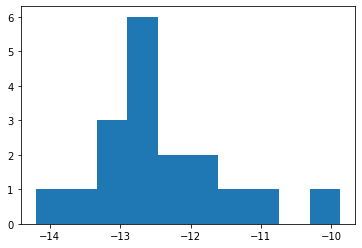

In [184]:
import numpy
from matplotlib import pyplot as plt 
bins = numpy.linspace(-10, 0, 10)

plt.hist(scoreDisDel, label='x')
# plt.hist(scoreDis, label='y')
# plt.hist(scoreDis, bins, alpha=0.5, label='y')
# plt.hist(scoreDisDel, bins, alpha=0.5, label='x')
# plt.legend(loc='upper right')
# plt.show()

(array([5., 8., 3., 1., 0., 0., 0., 0., 0., 1.]),
 array([-14.20019121, -13.05285896, -11.90552672, -10.75819447,
         -9.61086222,  -8.46352998,  -7.31619773,  -6.16886549,
         -5.02153324,  -3.874201  ,  -2.72686875]),
 <BarContainer object of 10 artists>)

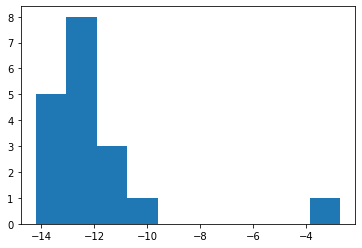

In [185]:
bins = numpy.linspace(-10, 0, 10)
plt.hist(scoreDis, label='y')

In [ ]:
codewords = [[1,2,3,4],[2,2,3,4],[1,1,2,3],[1,2,1,4]]
c_counter = char_freq(codewords)
c_word = [1,2,3]
p_cs = cal_pro(c_counter,c_word, len(codewords))
print(p_cs)

In [ ]:
num = array2num([1, 1, 2, 3, 4, 5])
print(num)

In [ ]:
print(mus[111111])

In [ ]:
deleRateDen**2/2)/math.sqrt(2*math.pi)

In [ ]:
stats.norm.pdf((85 - mus[111111])/(sigmas[111111]*0.1),0,1) - mus[111111])/(sigmas[111111]*0.1),0,1)
# stats.norm.pdf(0, 0, 1) * 0.01

In [ ]:
print(p_cs)
print(len(label_arrays))

In [54]:
print(delMap[:,signal_idx//5+1])

[7. 6. 9. 9. 0. 7. 9. 0. 8. 7. 9. 9. 0. 7. 7. 7. 7. 7. 0. 8. 0. 7. 7. 7.
 0. 0. 7. 7. 0. 6. 8. 0. 7. 0. 0. 0. 0. 0. 7. 0. 9. 0. 7. 0. 8. 0. 7. 0.
 0. 0. 0. 7. 0. 9. 8. 7. 8. 7. 8. 0. 9. 0. 0. 0. 7. 8. 0. 8. 8. 8. 0. 0.
 0. 9. 9. 7. 7. 7. 9. 9. 7. 0. 0. 0. 0. 7. 7. 7. 0. 7. 0. 9. 8. 0. 0. 0.
 0. 9. 9. 9. 9. 9. 9. 9. 0. 0. 0. 9. 0. 9. 0. 9. 9. 0. 0. 0. 9. 9. 9. 9.
 0. 9. 8. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 9. 0. 0. 9. 0.
 0. 0. 0. 9. 0. 8. 8. 0. 0. 8. 0. 8. 7. 8. 8. 0. 0. 0. 0. 0. 0. 0. 0.]


In [82]:
print(delMap[:,7])

[10.  1. 10. 10.  0.  1.  0.  0. 10.  5.  0.  5.  0.  0.  0.  0.  5.  1.
  1.  1.  0.  7.  6.  0.  0.  6.  6.  0.  0.  0.  5.  0.  0.  0.  0.  8.
  0.  7.  7.  0.  0.  9.  6.  0.  1.  0.  6.  0.  0.  0.  0.  5.  0.  1.
  5.  0. 10.  5.  8.  5.  6.  8.  0.  0.  0.  0.  0.  0. 10.  0.  0.  0.
  0.  0.  0.  7.  9. 10.  6.  0.  0.  0.  0.  8.  0.  9.  8.  8.  3.  0.
  7.  8.  0.  0.  0.  0.  0.  6.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  1.  6.  0.  0.  0.  0.  1. 10. 10.  0.  1.  0.  0. 10.  0.
  0.  1.  0.  6.  0.  6.  5.  0.  0.  0.  7.  7.  0.  0.  0.  6.  1.  0.
  6.  0.  0.  1.  0.  5.  0.  0.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.]


In [72]:
print(signal_idx)

80


In [139]:
print(real_path[signal_idx//5+1])

130


In [ ]:
print(last_state_graph[:,signal_idx//5+1])

In [50]:
print(dpvalue_graph[:,signal_idx//5+1])

[ -40.927  -40.927  -40.927     -inf     -inf   -7.825  -41.562     -inf
     -inf  -40.856  -88.598  -92.872     -inf     -inf     -inf     -inf
     -inf  -15.866  -41.562  -41.562     -inf     -inf     -inf     -inf
     -inf     -inf  -85.97   -75.379     -inf     -inf  -76.215     -inf
     -inf     -inf     -inf     -inf     -inf     -inf     -inf     -inf
  -10.605  -91.264  -47.44      -inf  -13.759     -inf  -75.379     -inf
     -inf     -inf  -78.584  -96.037     -inf  -10.219     -inf     -inf
     -inf     -inf     -inf     -inf  -16.329     -inf     -inf     -inf
     -inf     -inf  -93.185     -inf     -inf  -40.793     -inf     -inf
 -103.172  -84.67   -84.67   -75.379  -40.793  -76.333     -inf     -inf
  -40.793  -80.055  -75.195     -inf     -inf  -47.44      -inf     -inf
     -inf     -inf     -inf  -73.892     -inf     -inf     -inf     -inf
  -84.885  -16.511  -16.511  -16.511  -16.25   -16.25   -40.856  -40.856
     -inf     -inf     -inf     -inf     -inf     -

In [38]:
print(dpvalue_graph[128,signal_idx//5+1])

-224.1466561268403


In [51]:
print(prefix_label_graph[:,signal_idx//5+1])
np.where(prefix_label_graph[:,signal_idx//5+1] == codewords[signal_idx//5])

[43121. 43122. 43123.     0.     0. 43114. 43424.     0.     0. 43413.
 42133. 42134.     0.     0.     0.     0.     0. 43341. 43421. 43423.
     0.     0.     0.     0.     0.     0. 41224. 41231.     0.     0.
 14312.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 43132. 43223. 41241.     0. 43312.     0. 41233.     0.     0.     0.
 42131. 32232.     0. 43112.     0.     0.     0.     0.     0.     0.
 43311.     0.     0.     0.     0.     0. 32241.     0.     0. 43432.
     0.     0. 42313. 43211. 43213. 41232. 43434. 43243.     0.     0.
 43433. 42111. 42113.     0.     0. 41243.     0.     0.     0.     0.
     0. 41213.     0.     0.     0.     0. 43232. 43331. 43332. 43333.
 43342. 43343. 43411. 43412.     0.     0.     0.     0.     0.     0.
     0. 43431. 43131.     0.     0.     0. 43121. 43122. 43123.     0.
     0. 43114. 43424.     0.     0. 43413. 42134. 43341. 43421. 43423.
     0. 41224. 14312.     0.     0.     0.     0.     0.     0. 43132.
 43223

(array([  5, 121], dtype=int64),)

In [39]:
print(prefix_label_graph[128,signal_idx//5+1])

13421.0


In [49]:
print(codewords[signal_idx//5])

31424


In [ ]:
a = np.arange(6) + 10
a[0] = 100
np.argmax(a)